In [1]:
import ssl
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torchvision
from fedlab.utils.dataset.partition import MNISTPartitioner
from fedlab.utils.functional import partition_report
from torchvision.datasets.utils import download_and_extract_archive

In [2]:
# Dataset and Transformation
transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5,), (0.5,)),
    ]
)

ssl._create_default_https_context = ssl._create_unverified_context

# Override the MNIST resources URLs
class PatchedMNIST(torchvision.datasets.MNIST):
    resources = [
                ('https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz', 'f68b3c2dcbeaaa9fbdd348bbdeb94873'),
                ('https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz', 'd53e105ee54ea40749a09fcbcd1e9432'),
                ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz', '9fb629c4189551a2d022fa330f9573f3'),
                ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz', 'ec29112dd5afa0611ce80d1b7f02629c')
            ]
    
    @property
    def raw_folder(self):
        return os.path.join(self.root, "MNIST", "raw")
    
    @property
    def processed_folder(self):
        return os.path.join(self.root, "MNIST", "processed")

    def download(self):
        if self._check_exists():
            return
        
        os.makedirs(self.raw_folder, exist_ok=True)
        
        for url, md5 in self.resources:
            filename = os.path.basename(url)
            download_and_extract_archive(url, download_root=self.raw_folder, filename=filename, md5=md5)


# Load MNIST dataset
trainset = PatchedMNIST(root="path_to_data/", train=True, download=True, transform=transform)


In [3]:
num_clients = 100
seed = 2021
alpha_values = [0.1, 0.3, 1.0, 5.0, 10.0]
partitions = {}

# Dirichlet partitions
for alpha in alpha_values:
    partitions[f"Dirichlet_alpha_{alpha}"] = MNISTPartitioner(
        trainset.targets,
        num_clients=num_clients,
        partition="noniid-labeldir",
        dir_alpha=alpha,
        seed=seed,
    )


Class frequencies:
client,class0,class1,class2,class3,class4,class5,class6,class7,class8,class9,Amount
Client   0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.075,0.925,0.00,53
Client   1,0.00,0.00,0.00,0.00,0.036,0.015,0.949,0.00,0.00,0.00,333
Client   2,0.056,0.187,0.00,0.00,0.013,0.00,0.002,0.185,0.00,0.557,915
Client   3,0.006,0.434,0.170,0.00,0.017,0.00,0.004,0.00,0.00,0.369,705
Client   4,0.00,0.131,0.00,0.00,0.003,0.019,0.00,0.038,0.808,0.00,578
Client   5,0.00,0.00,0.00,0.00,0.00,0.00,0.159,0.00,0.454,0.386,471
Client   6,0.00,1.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1158
Client   7,0.046,0.00,0.00,0.00,0.012,0.00,0.003,0.728,0.009,0.203,345
Client   8,0.013,0.145,0.025,0.001,0.815,0.00,0.00,0.00,0.00,0.00,894
Client   9,0.304,0.00,0.123,0.018,0.011,0.420,0.00,0.007,0.011,0.105,276
Client  10,0.00,0.010,0.147,0.00,0.038,0.00,0.001,0.804,0.00,0.00,2838
Client  11,0.151,0.00,0.139,0.00,0.001,0.019,0.00,0.00,0.691,0.00,1527
Client  12,0.00,0.00,0.286,0.064,0.005,0.00,0.027,0.613,0.00

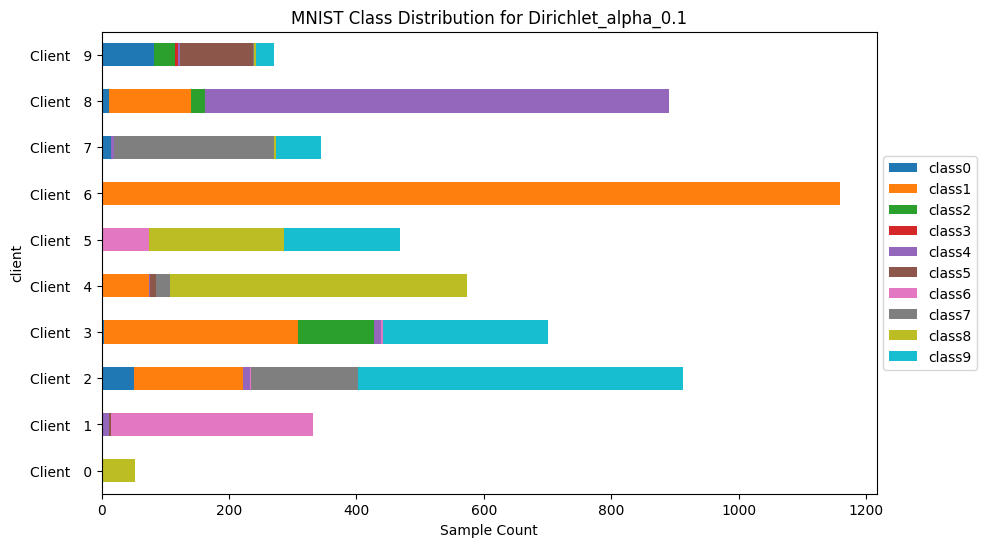

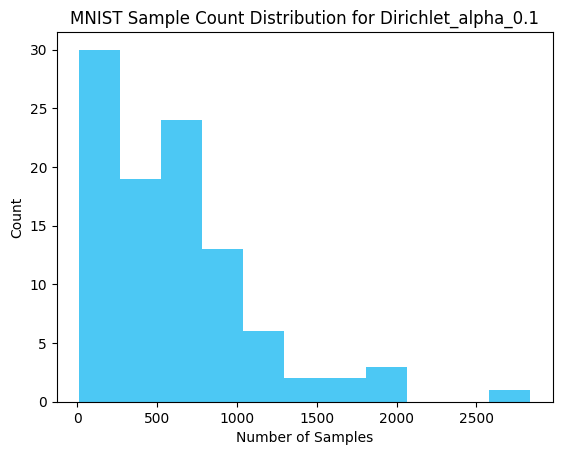

Class frequencies:
client,class0,class1,class2,class3,class4,class5,class6,class7,class8,class9,Amount
Client   0,0.114,0.029,0.036,0.010,0.033,0.00,0.00,0.742,0.013,0.023,306
Client   1,0.032,0.104,0.00,0.132,0.079,0.113,0.002,0.336,0.032,0.170,441
Client   2,0.007,0.072,0.022,0.019,0.00,0.013,0.005,0.087,0.008,0.767,1032
Client   3,0.011,0.367,0.00,0.002,0.022,0.192,0.385,0.00,0.015,0.007,548
Client   4,0.006,0.571,0.00,0.072,0.007,0.018,0.00,0.326,0.00,0.00,865
Client   5,0.120,0.101,0.208,0.009,0.562,0.00,0.00,0.00,0.00,0.00,683
Client   6,0.106,0.147,0.00,0.386,0.00,0.004,0.00,0.349,0.006,0.002,510
Client   7,0.074,0.387,0.210,0.00,0.251,0.037,0.015,0.004,0.022,0.00,271
Client   8,0.314,0.00,0.300,0.00,0.013,0.003,0.213,0.044,0.112,0.00,614
Client   9,0.310,0.011,0.076,0.003,0.296,0.065,0.003,0.110,0.006,0.121,355
Client  10,0.029,0.039,0.002,0.352,0.00,0.317,0.262,0.00,0.00,0.00,619
Client  11,0.00,0.013,0.513,0.025,0.146,0.00,0.209,0.006,0.032,0.057,158
Client  12,0.342,0.043,0.

<Figure size 640x480 with 0 Axes>

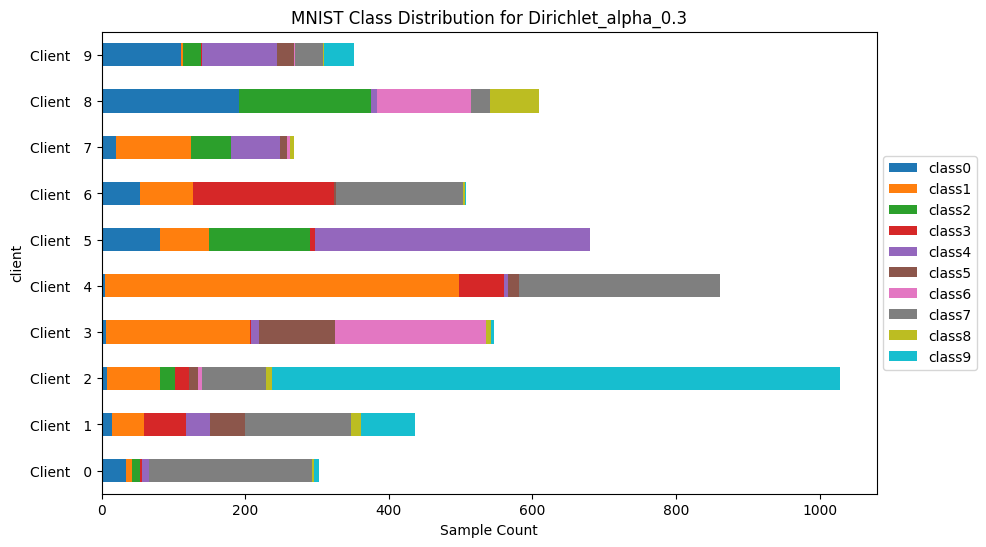

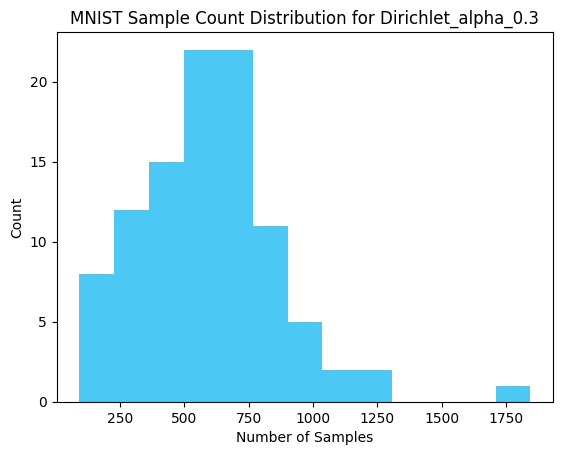

Class frequencies:
client,class0,class1,class2,class3,class4,class5,class6,class7,class8,class9,Amount
Client   0,0.079,0.071,0.104,0.159,0.157,0.162,0.085,0.082,0.101,0.00,635
Client   1,0.551,0.004,0.032,0.004,0.046,0.041,0.00,0.169,0.151,0.00,680
Client   2,0.048,0.038,0.157,0.051,0.381,0.006,0.007,0.020,0.291,0.00,687
Client   3,0.023,0.028,0.011,0.041,0.015,0.369,0.142,0.008,0.261,0.101,612
Client   4,0.045,0.138,0.013,0.090,0.221,0.034,0.088,0.005,0.178,0.187,556
Client   5,0.275,0.018,0.004,0.027,0.055,0.069,0.018,0.193,0.166,0.175,710
Client   6,0.045,0.298,0.160,0.027,0.039,0.059,0.225,0.070,0.002,0.077,561
Client   7,0.070,0.008,0.024,0.064,0.118,0.298,0.020,0.206,0.170,0.022,500
Client   8,0.031,0.028,0.209,0.178,0.161,0.093,0.035,0.266,0.00,0.00,719
Client   9,0.099,0.036,0.052,0.011,0.072,0.409,0.320,0.00,0.00,0.00,635
Client  10,0.117,0.124,0.130,0.012,0.061,0.085,0.155,0.316,0.00,0.00,684
Client  11,0.069,0.013,0.083,0.016,0.051,0.405,0.060,0.116,0.065,0.121,447
Client  

<Figure size 640x480 with 0 Axes>

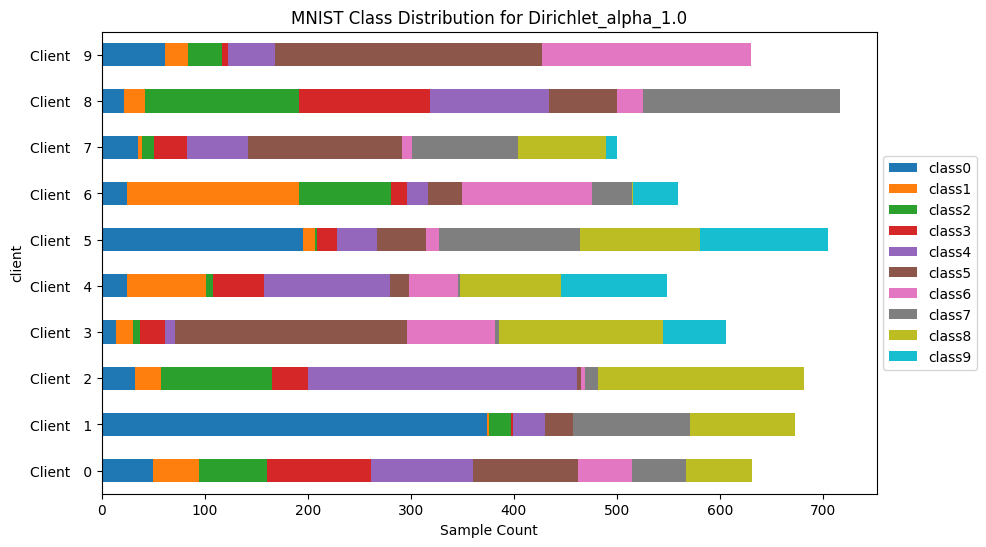

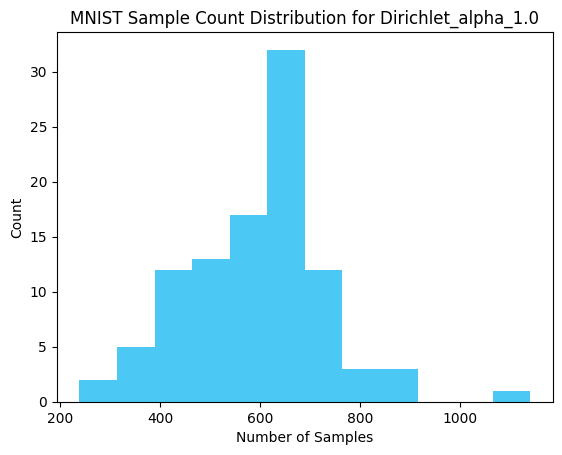

Class frequencies:
client,class0,class1,class2,class3,class4,class5,class6,class7,class8,class9,Amount
Client   0,0.044,0.054,0.183,0.143,0.085,0.127,0.060,0.091,0.046,0.165,496
Client   1,0.122,0.095,0.195,0.119,0.068,0.063,0.092,0.058,0.073,0.114,411
Client   2,0.090,0.176,0.086,0.122,0.131,0.126,0.083,0.131,0.055,0.00,613
Client   3,0.030,0.138,0.106,0.076,0.192,0.117,0.048,0.080,0.123,0.091,463
Client   4,0.077,0.219,0.065,0.062,0.108,0.179,0.120,0.105,0.065,0.00,627
Client   5,0.149,0.075,0.094,0.098,0.083,0.062,0.074,0.095,0.160,0.110,663
Client   6,0.113,0.088,0.111,0.063,0.094,0.079,0.104,0.144,0.048,0.157,479
Client   7,0.107,0.211,0.141,0.144,0.085,0.080,0.050,0.053,0.130,0.00,625
Client   8,0.098,0.131,0.051,0.119,0.057,0.057,0.131,0.043,0.125,0.188,489
Client   9,0.119,0.219,0.110,0.079,0.102,0.056,0.118,0.060,0.065,0.072,629
Client  10,0.194,0.093,0.080,0.053,0.191,0.093,0.074,0.085,0.136,0.00,623
Client  11,0.086,0.049,0.106,0.121,0.099,0.057,0.082,0.017,0.146,0.236,594
C

<Figure size 640x480 with 0 Axes>

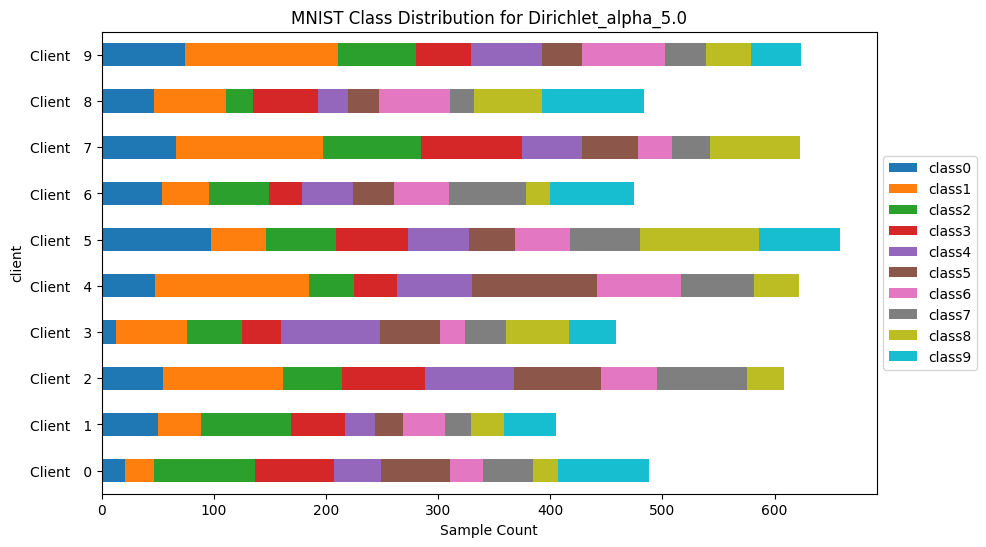

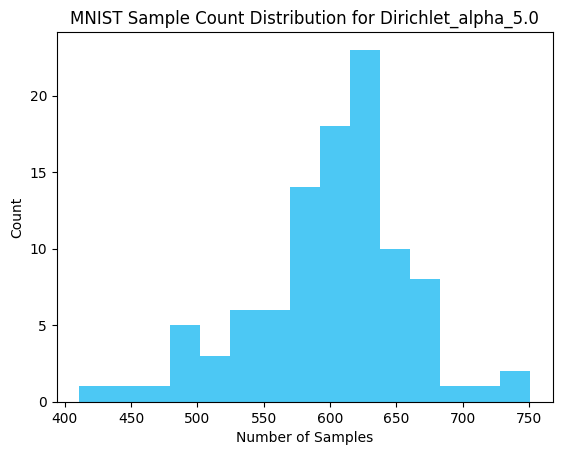

Class frequencies:
client,class0,class1,class2,class3,class4,class5,class6,class7,class8,class9,Amount
Client   0,0.051,0.061,0.107,0.125,0.140,0.040,0.081,0.112,0.102,0.180,606
Client   1,0.095,0.085,0.143,0.079,0.085,0.051,0.062,0.175,0.071,0.155,567
Client   2,0.088,0.150,0.060,0.158,0.079,0.098,0.127,0.068,0.172,0.00,646
Client   3,0.042,0.117,0.080,0.097,0.081,0.161,0.125,0.097,0.085,0.115,566
Client   4,0.082,0.181,0.074,0.104,0.111,0.094,0.096,0.100,0.047,0.111,637
Client   5,0.168,0.110,0.127,0.118,0.100,0.044,0.069,0.083,0.112,0.069,519
Client   6,0.105,0.091,0.165,0.074,0.129,0.128,0.076,0.059,0.107,0.067,541
Client   7,0.107,0.184,0.049,0.120,0.120,0.052,0.093,0.096,0.104,0.075,615
Client   8,0.087,0.110,0.064,0.085,0.100,0.135,0.105,0.115,0.062,0.135,598
Client   9,0.117,0.191,0.110,0.100,0.127,0.100,0.063,0.115,0.076,0.00,607
Client  10,0.188,0.115,0.063,0.117,0.047,0.095,0.093,0.035,0.104,0.142,537
Client  11,0.094,0.068,0.101,0.077,0.122,0.120,0.122,0.057,0.132,0.106,574

<Figure size 640x480 with 0 Axes>

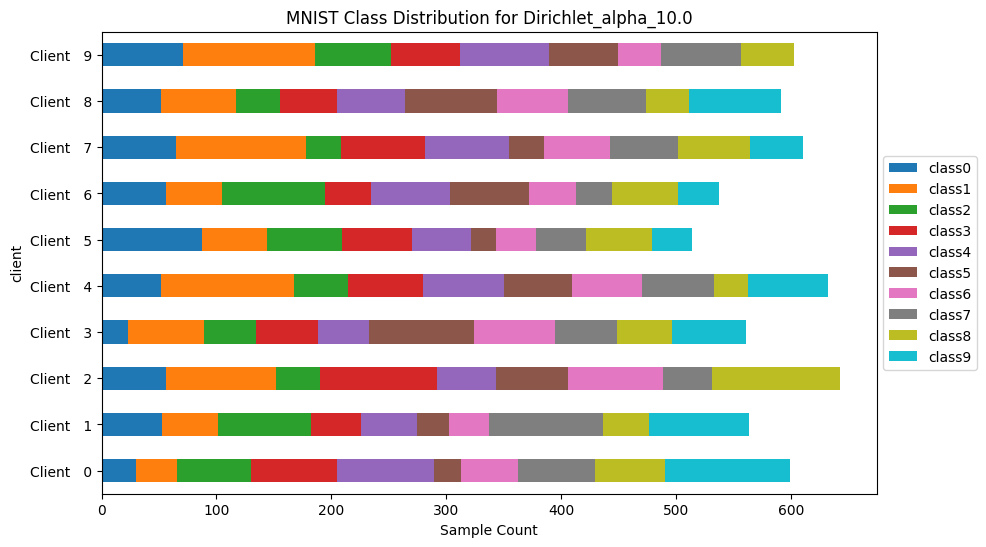

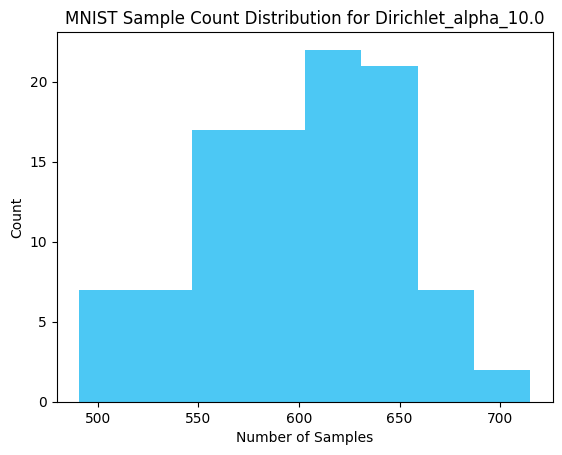

<Figure size 640x480 with 0 Axes>

In [4]:
# Visualization and reporting
for name, part in partitions.items():
    csv_file = f"./partition-reports/MNIST_{name}.csv"
    partition_report(trainset.targets, part.client_dict, class_num=10, file=csv_file)

    partition_df = pd.read_csv(csv_file, header=1).set_index("client")
    for col in [f"class{i}" for i in range(10)]:
        partition_df[col] = (partition_df[col] * partition_df["Amount"]).astype(int)

    # Class distribution plot (First 10 clients)
    partition_df.iloc[:10, :10].plot.barh(stacked=True, figsize=(10, 6))
    plt.title(f"MNIST Class Distribution for {name}")
    plt.xlabel("Sample Count")
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.savefig(f"./imgs/MNIST_{name}_class_distribution.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.clf()

    # Sample count distribution
    sns.histplot(
        data=partition_df["Amount"], color="#00B1F0", edgecolor="none", alpha=0.7
    )
    plt.title(f"MNIST Sample Count Distribution for {name}")
    plt.xlabel("Number of Samples")
    plt.savefig(
        f"./imgs/MNIST_{name}_sample_count_distribution.png", dpi=300, bbox_inches="tight"
    )
    plt.show()
    plt.clf()


In [5]:
def full_knowledge_trim_attack(partitioner, trim_rate=0.7):
    client_sample_counts = {
        client: len(samples) for client, samples in partitioner.client_dict.items()
    }

    sorted_clients = sorted(
        client_sample_counts.keys(), key=lambda k: client_sample_counts[k]
    )

    num_trim_clients = int(len(sorted_clients) * trim_rate)
    trimmed_clients = sorted_clients[:num_trim_clients]

    adjusted_client_dict = {
        client: samples
        for client, samples in partitioner.client_dict.items()
        if client not in trimmed_clients
    }

    return adjusted_client_dict, trimmed_clients


Class frequencies:
client,class0,class1,class2,class3,class4,class5,class6,class7,class8,class9,Amount
Client   2,0.056,0.187,0.00,0.00,0.013,0.00,0.002,0.185,0.00,0.557,915
Client   6,0.00,1.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1158
Client   8,0.013,0.145,0.025,0.001,0.815,0.00,0.00,0.00,0.00,0.00,894
Client  10,0.00,0.010,0.147,0.00,0.038,0.00,0.001,0.804,0.00,0.00,2838
Client  11,0.151,0.00,0.139,0.00,0.001,0.019,0.00,0.00,0.691,0.00,1527
Client  15,0.00,0.018,0.00,0.00,0.070,0.912,0.00,0.00,0.00,0.00,1894
Client  17,1.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1897
Client  18,0.397,0.033,0.00,0.005,0.00,0.00,0.565,0.00,0.00,0.00,1102
Client  25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.228,0.00,0.772,947
Client  26,0.00,0.00,0.010,0.004,0.00,0.986,0.00,0.00,0.00,0.00,763
Client  27,0.001,0.001,0.00,0.061,0.938,0.00,0.00,0.00,0.00,0.00,1584
Client  32,0.075,0.00,0.00,0.00,0.00,0.00,0.00,0.001,0.096,0.827,747
Client  36,0.199,0.00,0.372,0.00,0.00,0.00,0.00,0.429,0.00,0.00,996

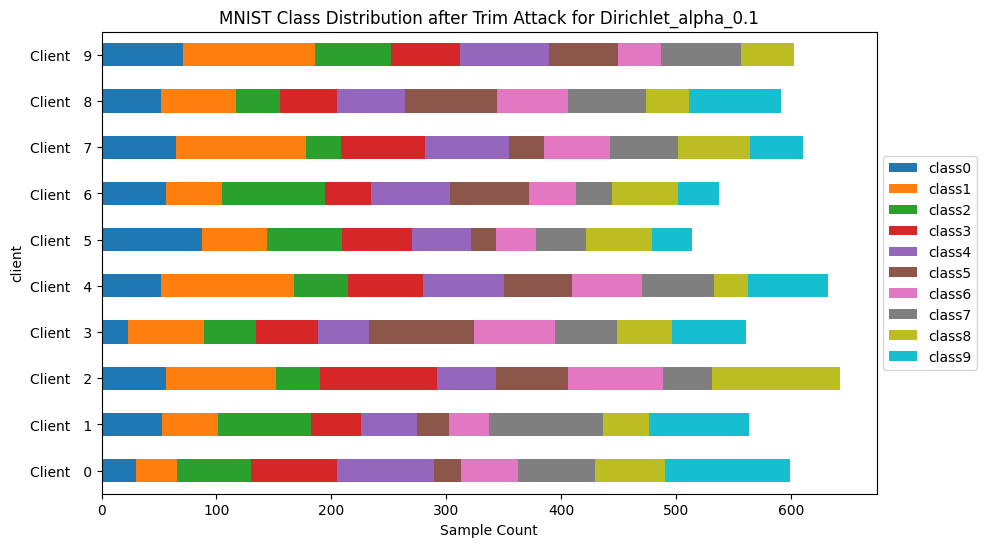

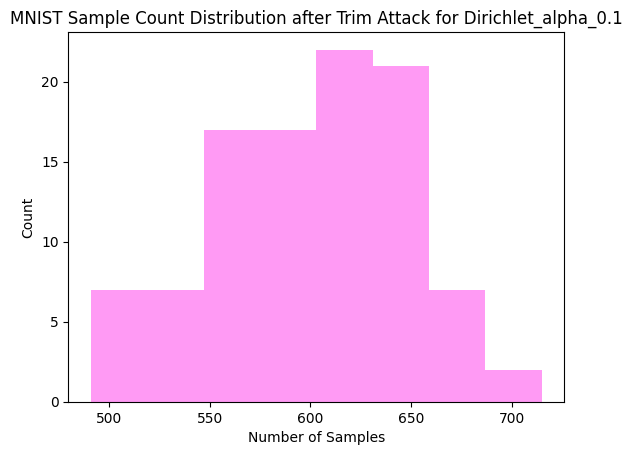

Class frequencies:
client,class0,class1,class2,class3,class4,class5,class6,class7,class8,class9,Amount
Client   2,0.007,0.072,0.022,0.019,0.00,0.013,0.005,0.087,0.008,0.767,1032
Client   4,0.006,0.571,0.00,0.072,0.007,0.018,0.00,0.326,0.00,0.00,865
Client  16,0.028,0.090,0.180,0.702,0.00,0.00,0.00,0.00,0.00,0.00,1124
Client  17,0.048,0.336,0.299,0.316,0.00,0.00,0.00,0.00,0.00,0.00,743
Client  22,0.171,0.255,0.00,0.031,0.015,0.127,0.091,0.101,0.00,0.210,715
Client  24,0.00,0.009,0.067,0.215,0.002,0.025,0.040,0.203,0.439,0.00,1029
Client  25,0.271,0.011,0.190,0.001,0.527,0.00,0.00,0.00,0.00,0.00,738
Client  27,0.083,0.086,0.001,0.830,0.00,0.00,0.00,0.00,0.00,0.00,911
Client  28,0.003,0.046,0.086,0.004,0.613,0.249,0.00,0.00,0.00,0.00,760
Client  32,0.235,0.001,0.118,0.048,0.001,0.001,0.103,0.135,0.356,0.00,710
Client  35,0.031,0.00,0.013,0.00,0.223,0.001,0.078,0.654,0.00,0.00,794
Client  36,0.247,0.001,0.342,0.005,0.00,0.405,0.00,0.00,0.00,0.00,888
Client  37,0.019,0.558,0.00,0.149,0.022,

<Figure size 640x480 with 0 Axes>

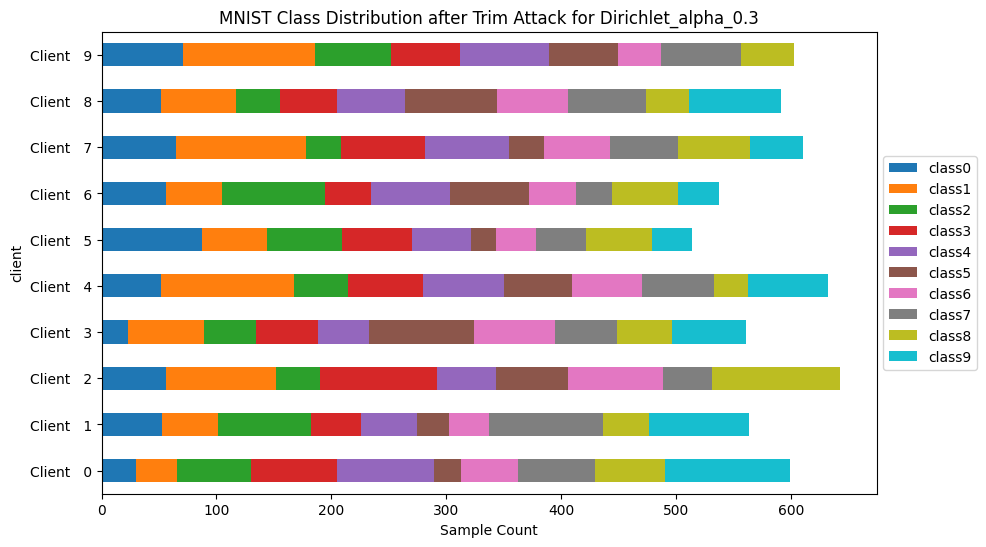

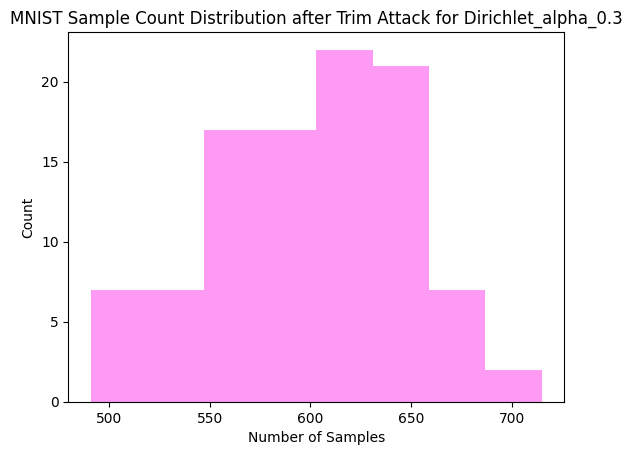

Class frequencies:
client,class0,class1,class2,class3,class4,class5,class6,class7,class8,class9,Amount
Client   1,0.551,0.004,0.032,0.004,0.046,0.041,0.00,0.169,0.151,0.00,680
Client   2,0.048,0.038,0.157,0.051,0.381,0.006,0.007,0.020,0.291,0.00,687
Client   5,0.275,0.018,0.004,0.027,0.055,0.069,0.018,0.193,0.166,0.175,710
Client   8,0.031,0.028,0.209,0.178,0.161,0.093,0.035,0.266,0.00,0.00,719
Client  10,0.117,0.124,0.130,0.012,0.061,0.085,0.155,0.316,0.00,0.00,684
Client  18,0.176,0.001,0.129,0.015,0.179,0.351,0.149,0.00,0.00,0.00,689
Client  21,0.107,0.026,0.201,0.156,0.510,0.00,0.00,0.00,0.00,0.00,681
Client  24,0.606,0.165,0.229,0.00,0.00,0.00,0.00,0.00,0.00,0.00,726
Client  28,0.145,0.178,0.027,0.062,0.095,0.040,0.056,0.040,0.358,0.00,780
Client  30,0.119,0.016,0.110,0.010,0.073,0.029,0.087,0.283,0.273,0.00,689
Client  33,0.041,0.039,0.110,0.005,0.126,0.054,0.016,0.046,0.088,0.473,736
Client  35,0.060,0.060,0.117,0.067,0.276,0.001,0.072,0.346,0.00,0.00,863
Client  36,0.055,0.502,

<Figure size 640x480 with 0 Axes>

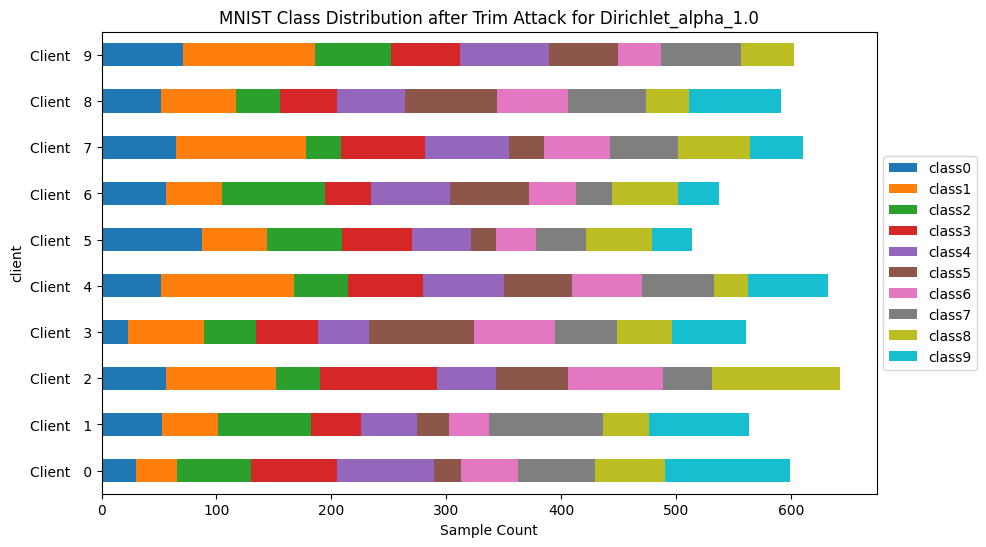

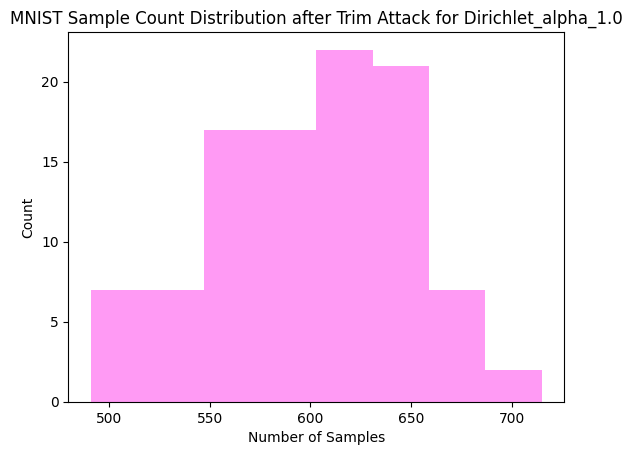

Class frequencies:
client,class0,class1,class2,class3,class4,class5,class6,class7,class8,class9,Amount
Client   5,0.149,0.075,0.094,0.098,0.083,0.062,0.074,0.095,0.160,0.110,663
Client   9,0.119,0.219,0.110,0.079,0.102,0.056,0.118,0.060,0.065,0.072,629
Client  14,0.130,0.101,0.055,0.108,0.052,0.080,0.017,0.126,0.081,0.250,713
Client  15,0.133,0.063,0.130,0.105,0.048,0.051,0.151,0.114,0.086,0.119,630
Client  18,0.212,0.113,0.050,0.093,0.110,0.086,0.126,0.053,0.156,0.00,636
Client  26,0.080,0.103,0.056,0.104,0.060,0.083,0.094,0.314,0.107,0.00,663
Client  27,0.094,0.052,0.051,0.169,0.103,0.116,0.051,0.091,0.107,0.167,629
Client  30,0.152,0.177,0.083,0.080,0.167,0.083,0.086,0.054,0.118,0.00,672
Client  32,0.043,0.099,0.062,0.166,0.056,0.056,0.160,0.129,0.054,0.174,644
Client  40,0.134,0.103,0.081,0.086,0.166,0.058,0.025,0.079,0.104,0.165,643
Client  41,0.229,0.063,0.173,0.080,0.121,0.063,0.047,0.093,0.132,0.00,637
Client  44,0.148,0.072,0.121,0.087,0.070,0.033,0.114,0.153,0.082,0.118,667
C

<Figure size 640x480 with 0 Axes>

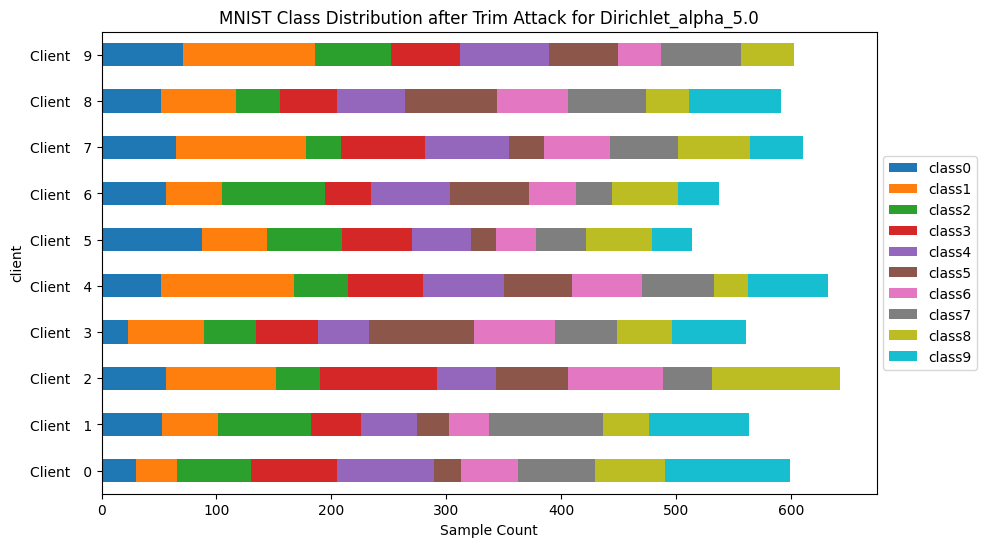

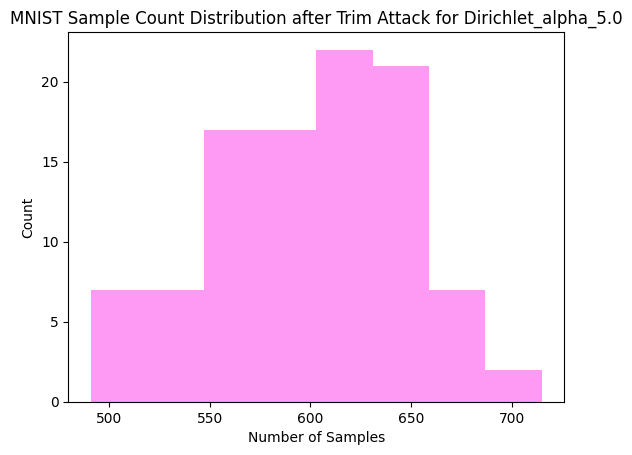

Class frequencies:
client,class0,class1,class2,class3,class4,class5,class6,class7,class8,class9,Amount
Client   2,0.088,0.150,0.060,0.158,0.079,0.098,0.127,0.068,0.172,0.00,646
Client   4,0.082,0.181,0.074,0.104,0.111,0.094,0.096,0.100,0.047,0.111,637
Client  14,0.126,0.109,0.152,0.112,0.061,0.094,0.061,0.166,0.119,0.00,658
Client  15,0.120,0.076,0.077,0.094,0.128,0.088,0.090,0.110,0.123,0.094,648
Client  18,0.169,0.112,0.117,0.100,0.055,0.085,0.083,0.109,0.055,0.112,649
Client  22,0.077,0.102,0.060,0.119,0.122,0.082,0.094,0.156,0.091,0.099,649
Client  30,0.138,0.159,0.080,0.173,0.071,0.059,0.051,0.091,0.098,0.079,646
Client  35,0.051,0.120,0.095,0.089,0.108,0.081,0.084,0.116,0.098,0.157,664
Client  38,0.087,0.051,0.102,0.102,0.124,0.107,0.102,0.101,0.042,0.180,644
Client  39,0.121,0.124,0.111,0.148,0.060,0.085,0.090,0.044,0.110,0.107,655
Client  40,0.122,0.113,0.102,0.056,0.071,0.094,0.068,0.199,0.073,0.103,648
Client  42,0.134,0.076,0.070,0.081,0.109,0.106,0.064,0.129,0.146,0.087,644

<Figure size 640x480 with 0 Axes>

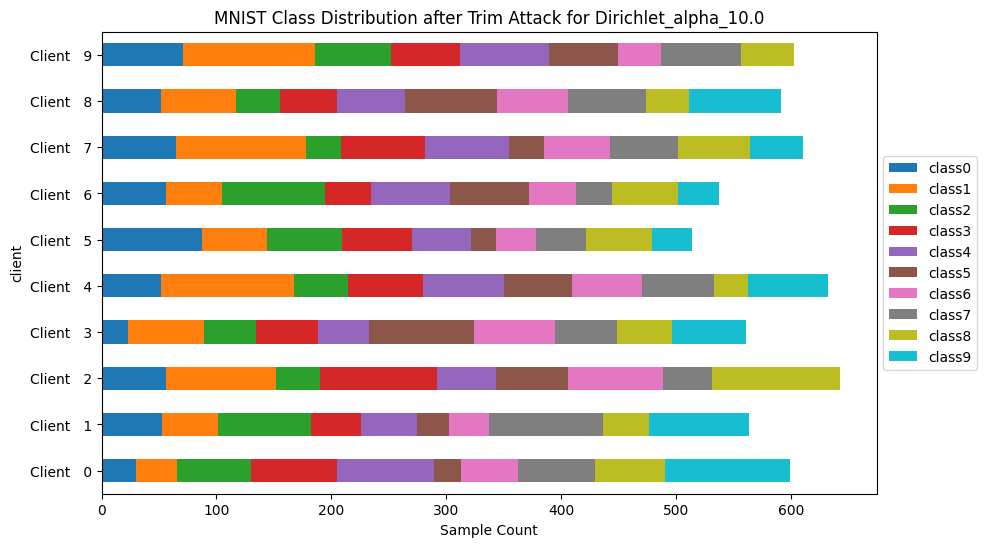

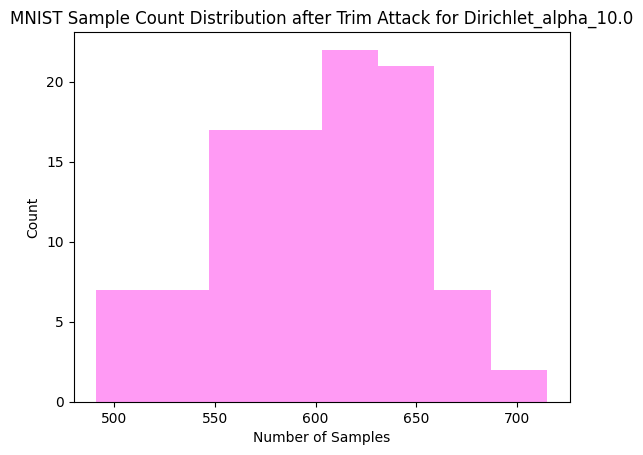

<Figure size 640x480 with 0 Axes>

In [6]:
trim_rate = 0.7
attack_results = {}

for name, part in partitions.items():
    adjusted_client_dict, trimmed_clients = full_knowledge_trim_attack(
        part, trim_rate=trim_rate
    )
    attack_results[name] = {
        "adjusted_client_dict": adjusted_client_dict,
        "trimmed_clients": trimmed_clients,
    }

    csv_file = f"./partition-reports/MNIST_{name}_after_attack.csv"
    partition_report(
        trainset.targets, adjusted_client_dict, class_num=10, file=csv_file
    )

    original_partition_df = pd.read_csv(
        f"./partition-reports/MNIST_{name}.csv", header=1
    ).set_index("client")
    adjusted_partition_df = pd.read_csv(csv_file, header=1).set_index("client")

    for col in [f"class{i}" for i in range(10)]:
        original_partition_df[col] = (
            original_partition_df[col] * original_partition_df["Amount"]
        ).astype(int)
        adjusted_partition_df[col] = (
            adjusted_partition_df[col] * adjusted_partition_df["Amount"]
        ).astype(int)

    # Graph: Class distribution post-attack (First 10 clients)
    partition_df.iloc[:10, :10].plot.barh(stacked=True, figsize=(10, 6))
    plt.title(f"MNIST Class Distribution after Trim Attack for {name}")
    plt.xlabel("Sample Count")
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.savefig(
        f"./imgs/MNIST_{name}_class_distribution_after_attack.png",
        dpi=300,
        bbox_inches="tight",
    )
    plt.show()
    plt.clf()

    # Graph: Sample count distribution post-attack
    sns.histplot(
        data=partition_df["Amount"], color="#FF6FF0", edgecolor="none", alpha=0.7
    )
    plt.title(f"MNIST Sample Count Distribution after Trim Attack for {name}")
    plt.xlabel("Number of Samples")
    plt.savefig(
        f"./imgs/MNIST_{name}_sample_count_distribution_after_attack.png",
        dpi=300,
        bbox_inches="tight",
    )
    plt.show()
    plt.clf()

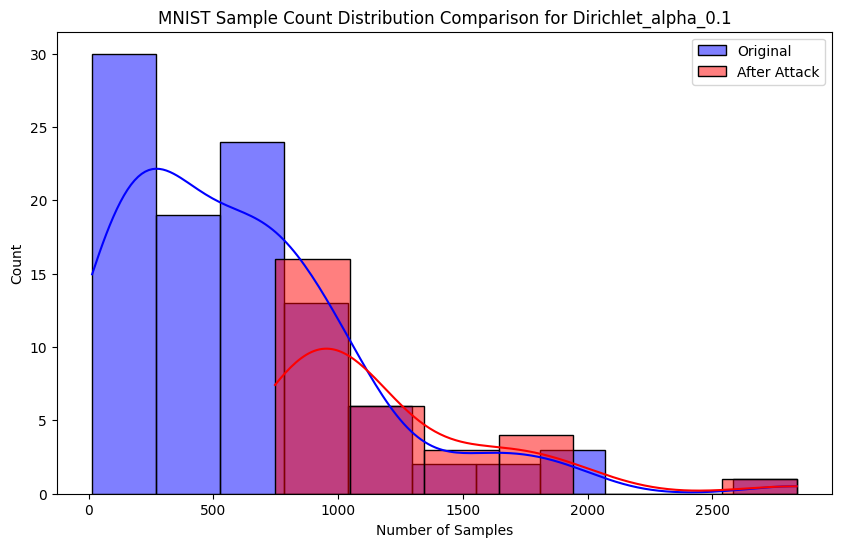

<Figure size 640x480 with 0 Axes>

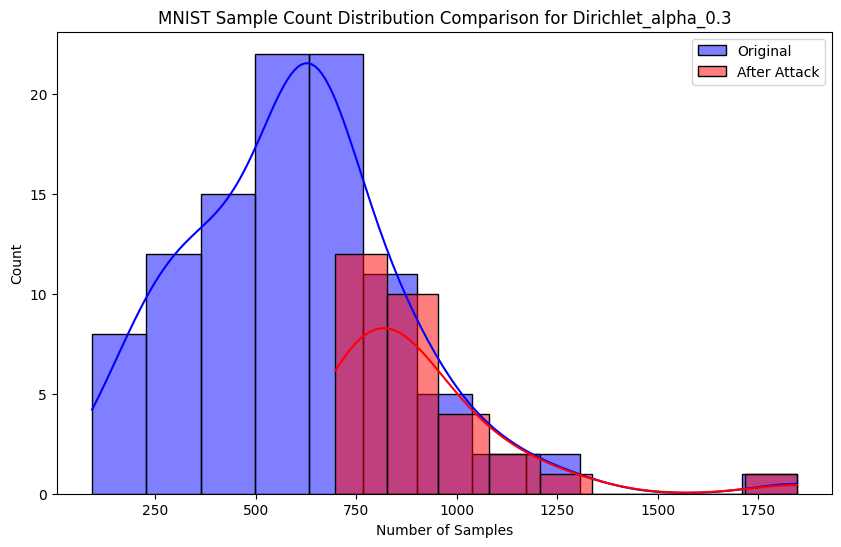

<Figure size 640x480 with 0 Axes>

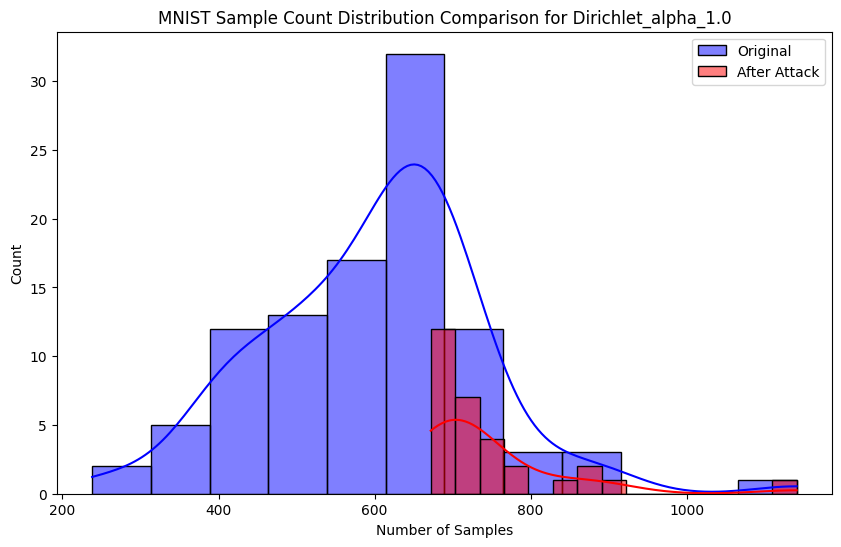

<Figure size 640x480 with 0 Axes>

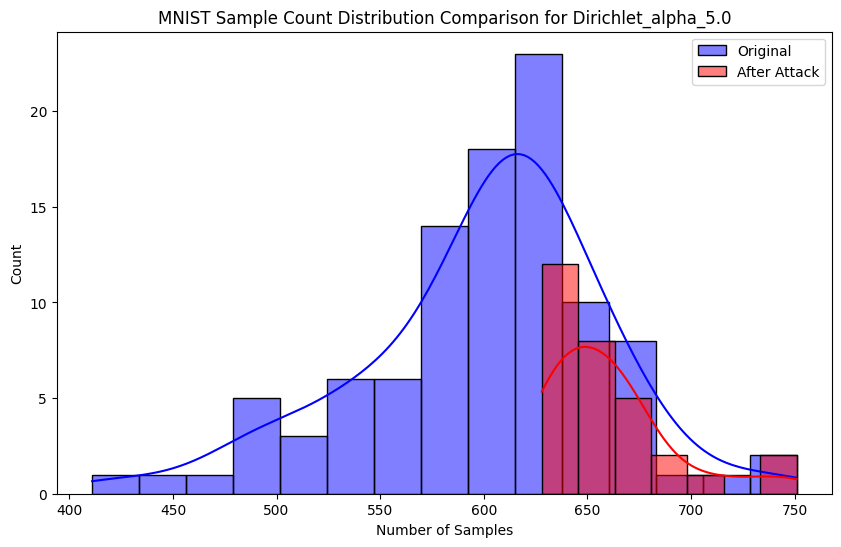

<Figure size 640x480 with 0 Axes>

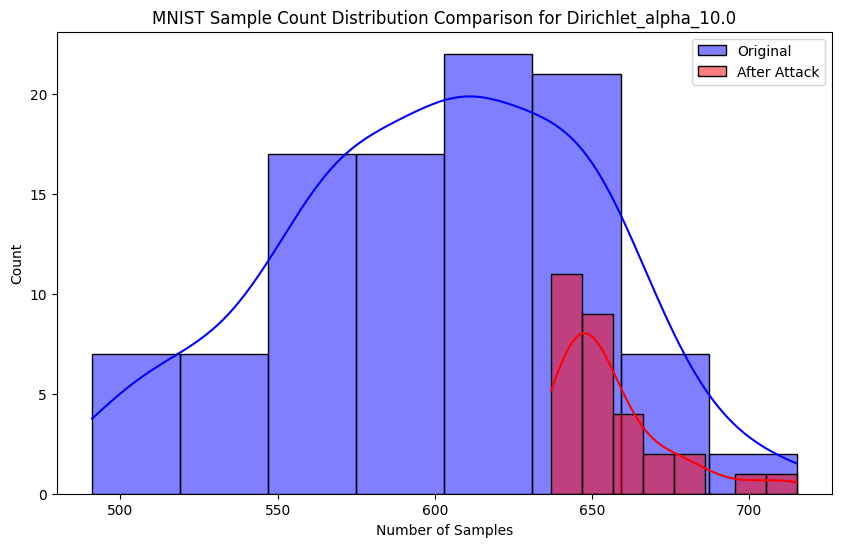

<Figure size 640x480 with 0 Axes>

In [7]:
for name in partitions.keys():
    original_report = pd.read_csv(f"./partition-reports/MNIST_{name}.csv", header=1)
    attack_report = pd.read_csv(
        f"./partition-reports/MNIST_{name}_after_attack.csv", header=1
    )

    # Comparison Graph: Original vs. Post-Attack Sample Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(
        original_report["Amount"], color="blue", label="Original", kde=True, alpha=0.5
    )
    sns.histplot(
        attack_report["Amount"], color="red", label="After Attack", kde=True, alpha=0.5
    )
    plt.title(f"MNIST Sample Count Distribution Comparison for {name}")
    plt.xlabel("Number of Samples")
    plt.legend()
    plt.savefig(
        f"./imgs/MNIST_{name}_sample_count_comparison.png", dpi=300, bbox_inches="tight"
    )
    plt.show()
    plt.clf()